<a href="https://colab.research.google.com/github/keunsooyoon/BigDataClass/blob/main/%EB%B6%84%EB%A5%98_%EC%95%84%EC%9D%B4%EB%A6%AC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 붓꽃의 품종 판별  - 분류
# setosa    versicolor    irginica

In [ ]:
import pandas as pd
import numpy as np

from sklearn import datasets
iris = datasets.load_iris() # 내장 데이터셋 읽어오기

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.keys() # iris는 딕셔너리 형태 key값만 확인

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
iris['target'] # 150개의 목표 변수 -> 품종

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris['data'].shape

(150, 4)

In [ ]:
# 데이터 프레임 으로 전환

df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# 열이름 변경
df.columns = ['sepal_length',	'sepal_width',	'petal_length', 'petal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['Target'] = iris['target']
df

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# 데이터 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe()   # 요약 통계 정보

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# 결측값 확인
df.isnull().sum()
# 데이터 프레임에 isnull() 적용하면 각 원소가 결측값인지 여부를 확인한다. 
# 결측값이면 True 정상이면 False, 여기에 sum을 적용하면 각 열의 결측값을 
# 개수를 계산해 준다. 결측값이면 1로 인식되기 때문에 각 열의 숫자를 모두 더해주는
# sum 함수의 출력 값이 각 열의 결측값의 개수가 된다. 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Target          0
dtype: int64

In [ ]:
# 결측값이 있으면 오류가 발생하므로 적절한 조치가 필요하다. 

In [ ]:
# 중복 데이터 확인

df.duplicated().sum()


1

In [ ]:
df.loc[df.duplicated(), :]

,sepal_length,sepal_width,petal_length,petal_width,Target
142,5.8,2.7,5.1,1.9,2


In [ ]:
df.loc[(df.sepal_length ==5.8)&(df.petal_width==1.9),:]

,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [ ]:
# 중복 데이터 삭제
df = df.drop_duplicates()

In [ ]:
df.loc[(df.sepal_length ==5.8)&(df.petal_width==1.9),:]

,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2


In [ ]:
# 상관 관계 분석
# corr 매소드는 변수 간의 상관 계수 행렬을 출력한다. 
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,Target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
Target,0.786971,-0.422987,0.949402,0.956514,1.000000


<function matplotlib.pyplot.show>

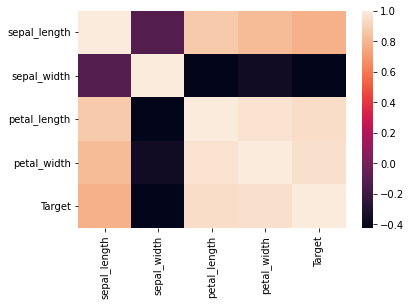

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data=df.corr())
plt.show

<function matplotlib.pyplot.show>

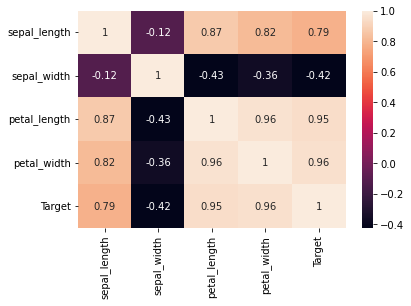

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data=df.corr(), annot=True)
plt.show

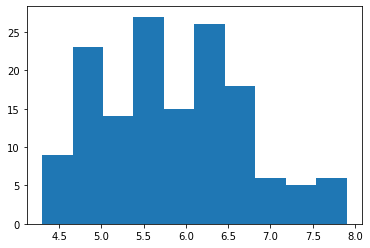

In [ ]:
plt.hist(x='sepal_length', data=df)
plt.show()

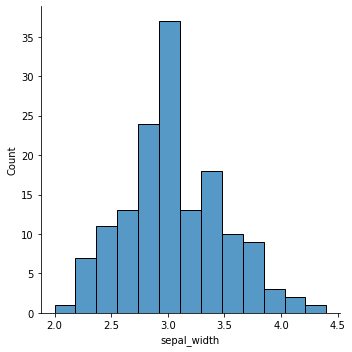

In [ ]:
sns.displot(x='sepal_width', kind='hist', data=df)

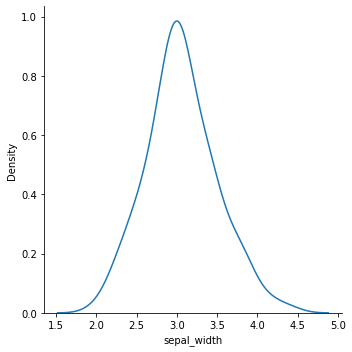

In [ ]:
sns.displot(x='sepal_width', kind='kde', data=df)   # 밀도 그래프

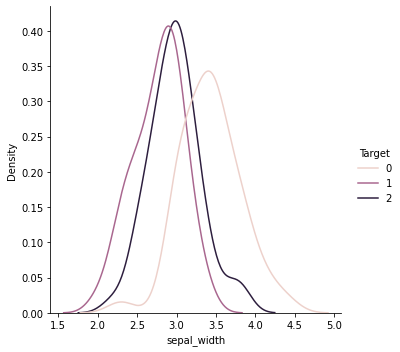

In [ ]:
sns.displot(x='sepal_width', hue='Target', kind='kde', data=df)

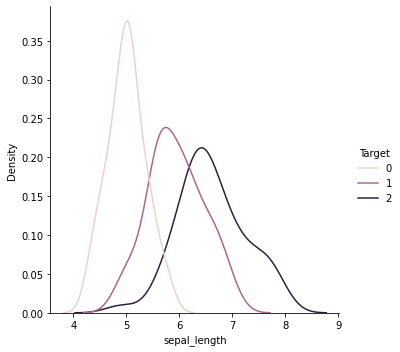

In [ ]:
sns.displot(x='sepal_length', hue='Target', kind='kde', data=df)
# 품종별로 분포의 중심 위치가 다르고 데이터가 퍼져 있는정도(분산)에도 차이가 있다.


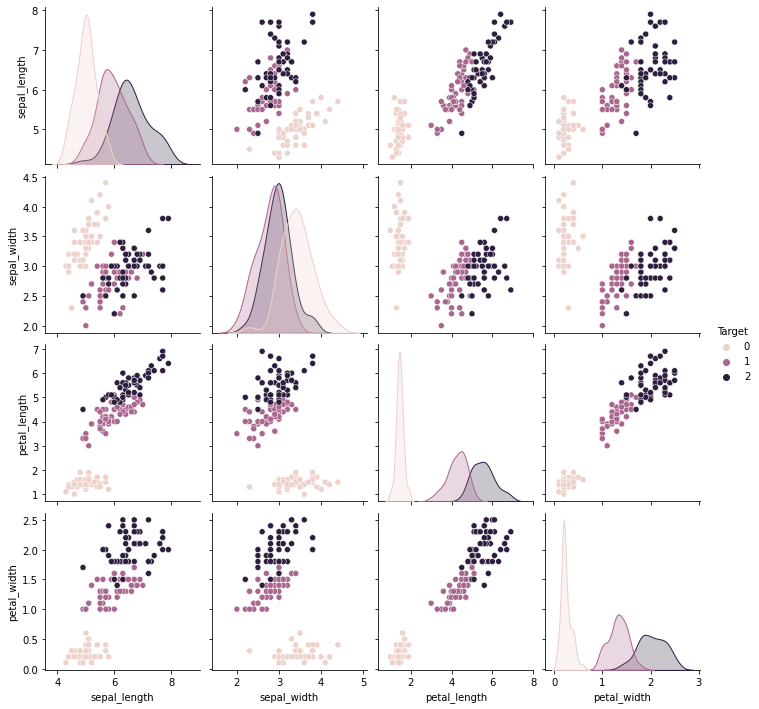

In [ ]:
sns.pairplot(df, hue='Target', diag_kind='kde')
plt.show()

# seaborn 의 pairplot 을 이용하면 서로 다른 피처간의 관계를 그림으로 한번에
# 그릴수 있다. hue 옵션에 Target  열을 지정하여 목표 클래스별로 구분하여 표시한다. 


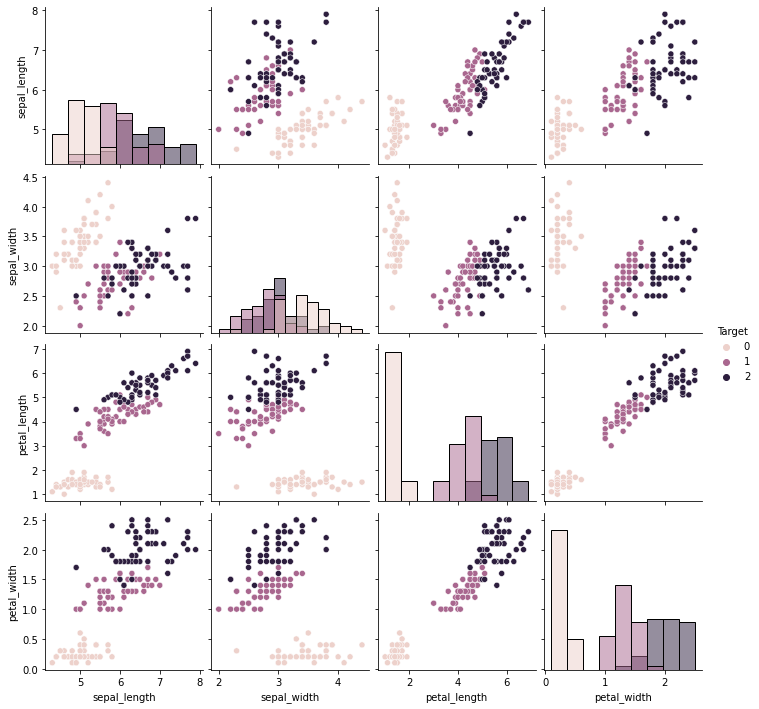

In [ ]:
sns.pairplot(df, hue='Target', diag_kind='hist')
plt.show()

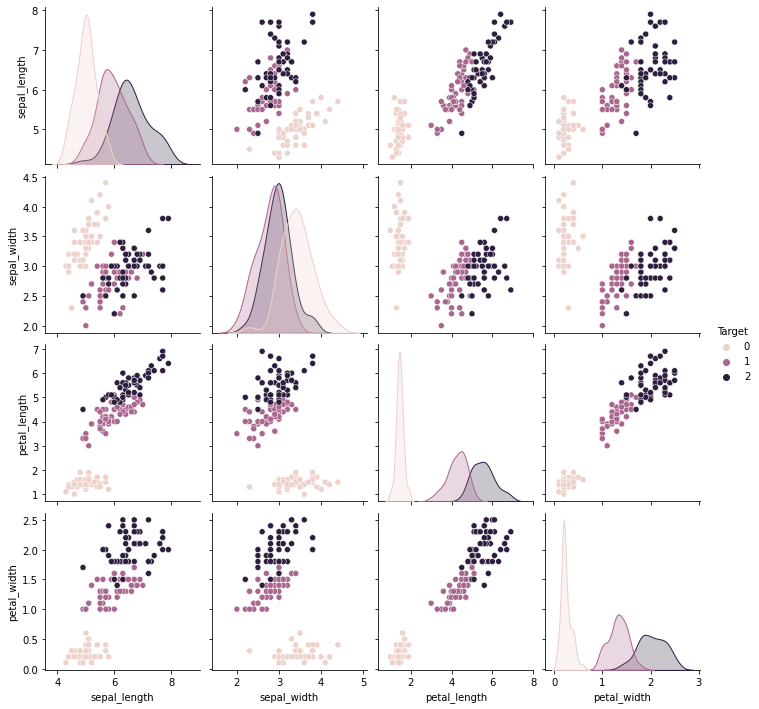

In [ ]:
sns.pairplot(df, hue='Target')
plt.show()

In [ ]:
# Train - Test  데이터 셋 분할 
# 훈련데이터(모델 학습에 사용)와 테스트 데이터(모델 성능을 평가)로 분할한다. 
# sklearn의 tarin_test_split 함수를 사용하면 쉽게 나눌 수 있다. 
from sklearn.model_selection import train_test_split

X_data = df.loc[:, 'sepal_length':'petal_width']
y_data = df.loc[:, 'Target']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(119, 4) (119,)
(30, 4) (30,)


In [ ]:
# KNN (K - Nearest - Neighbors : K 근접 이웃) Algorithms
# 예측(분류)하려는 데이터 X 가 주어지면 기존 데이터 중 속성이 비슷한
# K개의 이웃을 먼저 찾는다. 데이터 X를 둘러싼 K개의 가장 가까운 이웃을
# 찾고 이웃 데이터가 가장 많이 속해 있는 목표 클래스를 예측 값으로 결정한다. 

# 가까운 이웃을 3으로 설정 할때는 삼각형 클래스에 속하는 데이터가 2개로 가장 많다. 
# 그러나 k =5 로 설정하면 네모 클래스에 속하는 데이터가 3개로 가장 많다. 
# K값에 따라 KNN모델이 예측하는 클래스가 달라질 수 있다.


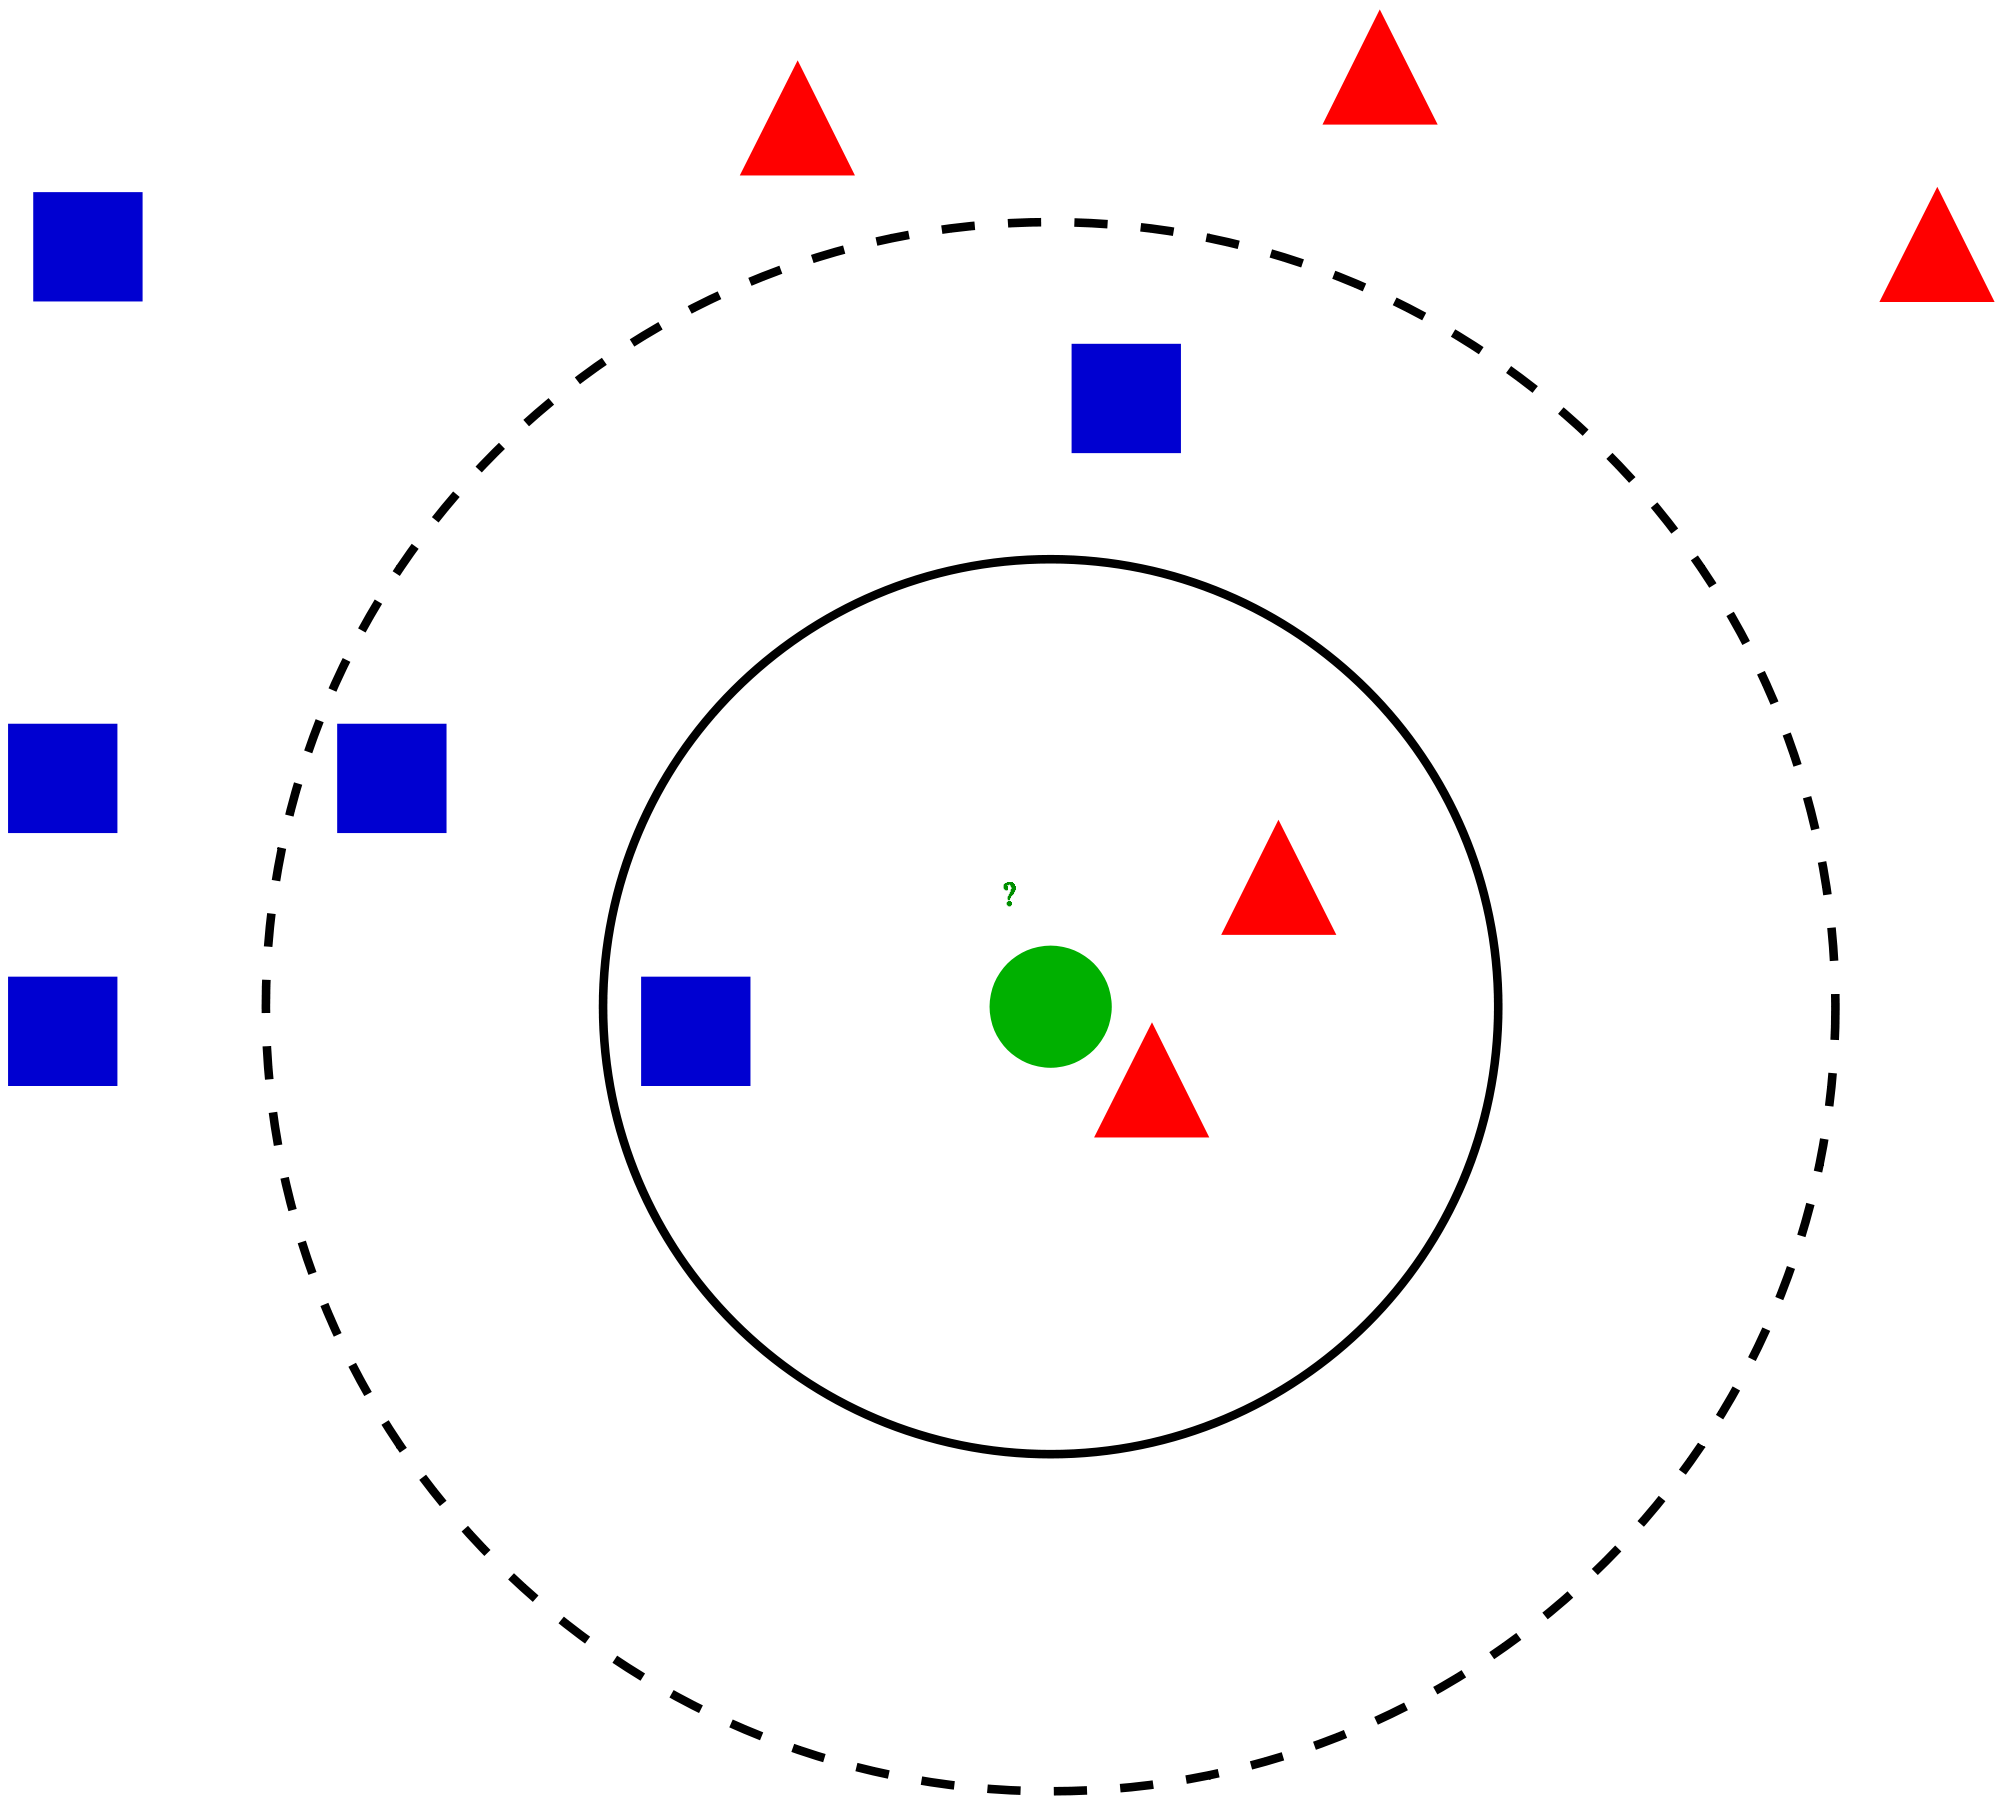

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [ ]:
y_knn_pred = knn.predict(X_test)
y_knn_pred
#모델에 검증용 데이터 X_test 를 넣어 예측값 산출
# 테스트 데이터 (X_test)

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
knn_acc
# 예측 값과 정답을 비교하여 모델 예측의 정확도를 산출한다. 
# 즉, 붓꽃 품종을 정확히 분류한 비율

#k = 9 -> 1.0

#k = 7 -> 0.9666666666666667

#k = 5 -> 0.9666666666666667

#k = 3 -> 0.9333333333333333

# 하이퍼파라미터 튜닝 : 속성 값을 조정하여 성능을 개선할 수 있다. 

0.9333333333333333

In [ ]:
# 의사결정나무 Decision Tree 의사결정나무

# 의사 결정 나무 모델은 트리 알고리즘을 사용한다. 트리의 각 분기점에는 데이터셋의
# 피처를 하나씩 위치시킨다. 임의의 조건으로 계속 2개 이상의 줄기로 가지를 나누면서
# 데이터를 구분한다. 이 때 각 분기점에서 분류가 가장 잘되는 최적의 기준을 찾는 과정이
# 중요하다. 

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4, random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# 예측
y_dtc_pred = dtc.predict(X_test)
y_dtc_pred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2])

In [ ]:
dtc_acc = accuracy_score(y_test, y_dtc_pred)
dtc_acc
# max_depth=4   0.9333333333333333
# max_depth=3   0.9333333333333333
# max_depth=2   0.9333333333333333
# max_depth=1   0.6333333333333333

0.9333333333333333

In [ ]:
# SVM (Support Vector Machine) - 모든 데이터를 벡터 공간내의
#  좌표에 점으로 표시하고 각 데이터가 속하는 클래스별로 군집을
#  이룬다고 가정한다. 
#  각 군집까지의 거리를 최대한 멀리 유지하는 경계면을 찾는다. 
#  이렇게하면 각 군집을 서로 확연하게 구분할 수 있다. 각 군집을
#  구분하는 경계면을 찾으면 새로운 데이터가 주어졌을 때 공간의
#  좌표에서 어느 군집에 속하는지 분류할 수 있다. 

In [ ]:
# 모델 학습

from sklearn.svm import SVC
# svc = SVC(kernel='rbf') # 파라미터 rbf: Radial Basis Function
# svc = SVC(kernel='linear') # 파라미터 linear : 기본값
svc = SVC(kernel='poly') # 0.9666666666666667

svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# 예측

y_svc_pred = svc.predict(X_test)
y_svc_pred


array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 2, 2])

In [ ]:
# 평가
svc_acc = accuracy_score(y_test, y_svc_pred)
svc_acc

0.9666666666666667

In [ ]:
# 로지스틱 회귀 Logistic Regression 
# 출력값을(0~1 사이의 실수) 각 분류 클래스에 속하게 될 확률값
# 으로 사용한다. 아이리스 데이터를 학습해서 각 품종에 속할
# 확률을 계산하여 1에 가까우면 해당 클래스로 분류하고 0에
# 가까우면 아니다라고 분류한다. 

In [ ]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression()
lrc.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_lrc_pred = lrc.predict(X_test)
y_lrc_pred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2])

In [ ]:
lrc_acc = accuracy_score(y_test, y_lrc_pred)
lrc_acc

1.0

In [ ]:
y_lrc_prob = lrc.predict_proba(X_test)
y_lrc_prob

array([[9.83094486e-01, 1.69054561e-02, 5.76311710e-08],
       [4.60693069e-03, 8.41461542e-01, 1.53931527e-01],
       [1.03676263e-02, 9.20150923e-01, 6.94814504e-02],
       [2.57653286e-05, 5.16405458e-02, 9.48333689e-01],
       [2.39285321e-02, 9.52024719e-01, 2.40467487e-02],
       [2.93670995e-02, 9.25895394e-01, 4.47375065e-02],
       [4.78583033e-06, 1.77674944e-02, 9.82227720e-01],
       [9.80412686e-01, 1.95872007e-02, 1.13568066e-07],
       [1.22345693e-05, 6.66997896e-02, 9.33287976e-01],
       [9.75407022e-01, 2.45929136e-02, 6.41393616e-08],
       [2.73400370e-05, 2.71294883e-02, 9.72843172e-01],
       [1.71532350e-03, 7.49889659e-01, 2.48395017e-01],
       [7.53093521e-04, 4.91872227e-01, 5.07374680e-01],
       [9.84534691e-01, 1.54652804e-02, 2.81281414e-08],
       [9.76954376e-01, 2.30455599e-02, 6.38303698e-08],
       [1.28090924e-03, 2.60490311e-01, 7.38228779e-01],
       [9.91798218e-01, 8.20177033e-03, 1.12007812e-08],
       [4.15678681e-03, 8.61228

In [ ]:
# 앙상블 - 여러 모델을 결합하여 성능을 높이는 방법,
#          하나의 모델 예측에 의존하는 것보다 여러 모델의 예측을
#          결합하여 최종 예측값을 결정하는 방법

# 보팅 Voting - 여러개의 모델이 예측한 값을 종합하여 최종 예측값을
#               결정하는데 모들델이 예측한 값 중에서 다수결로 
#               최종 분류 클래스를 정한다. 


In [ ]:
from sklearn.ensemble import VotingClassifier
hvc = VotingClassifier(estimators=[('KNN',knn),('SVM',svc),('DT',dtc)],
                       voting='hard')
# voting= 'hard' *** 3개의 모델이 예측한 값 중에서 다수결로 최종 분류 클래스를 정한다. 
# voting= 'soft' 3개의 모델의 각 분류 클래스별 예측 확률을 평균하여 최종 클래스를
#          결정한다. 

hvc.fit(X_train, y_train)

y_hvc_pred = hvc.predict(X_test)
print("예측값:",y_hvc_pred)

hvc_acc = accuracy_score(y_test, y_hvc_pred)
print("정확도:",hvc_acc)


예측값: [0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 2]
정확도: 0.9666666666666667


In [ ]:
# 배깅 bagging - 전체 학습 데이터 중에서 서로 다른 데이터를 샘플링하여 학습한다.

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50, max_depth=3, random_state=20)

rfc.fit(X_train, y_train)

#예측
y_pred = rfc.predict(X_test)
y_pred

#평가
rfc_acc = accuracy_score(y_test, y_pred)
rfc_acc

0.9666666666666667